#### Bag of Words(BoW) 
- 단어의 등장 순서를 고려하지 않는 빈도수 기반의 텍스트 데이터의 수치화 방법
- 가방에 단어들을 넣으면 순서가 중요하지 않음
- 각 단어에 고유한 인덱스를 부여하고 각 인덱스의 위치에 단어의 출현 횟수를 저장

In [2]:
# 토큰화(형태소 분석)

from konlpy.tag import Okt  
import re 
okt=Okt() 
token=re.sub("[.!#~]","",
             '비가 오니 마음이 차분해지네요. 요즘 너무 더웠어요. 비가 오니 마음이 기쁘네요.')
token=okt.morphs(token)
print(token)

['비', '가', '오니', '마음', '이', '차분해지네요', '요즘', '너무', '더웠어요', '비', '가', '오니', '마음', '이', '기쁘네요']


In [3]:
word2index={}  #단어 사전(단어와 숫자 인덱스)
bow=[]  #단어 가방(단어와 출현 횟수)
for voca in token:  
    #사전에 없는 단어 추가
    if voca not in word2index.keys():  
        word2index[voca]=len(word2index)  
        #단어의 인덱스와 출현횟수(기본값:1)
        bow.insert(len(word2index)-1,1)
    else:
        #재등장하는 단어의 인덱스
        index=word2index.get(voca)
        #단어 카운트 증가
        bow[index]=bow[index]+1
print(word2index)  

{'비': 0, '가': 1, '오니': 2, '마음': 3, '이': 4, '차분해지네요': 5, '요즘': 6, '너무': 7, '더웠어요': 8, '기쁘네요': 9}


In [4]:
#단어의 출현 횟수
print(bow)

[2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


In [11]:
# CountVectorizer: 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
# 단어를 세서 벡터화(vectorize)함. 문서에서 어떤 단어가 몇 번 등장했는지 추출(extraction)
# 토크나이징+벡터화 동시에 처리
# 희소행렬 사용 (메모리 부족 문제 방지)

from sklearn.feature_extraction.text import CountVectorizer

corpus=['모처럼 전국에 비가 내리고 있습니다.']
line=['전국에 비가']
lines = ['모처럼 있습니다']
vector = CountVectorizer()
vector.fit(corpus)
print(vector.vocabulary_)   # 각 열이 의미하는 바
print(vector.transform(line).toarray()) #단어가 출현한 위치에 1 표시
print(vector.transform(lines).toarray()) #단어가 출현한 위치에 1 표시

{'모처럼': 1, '전국에': 4, '비가': 2, '내리고': 0, '있습니다': 3}
[[0 0 1 0 1]]
[[0 1 0 1 0]]


In [13]:
vector.transform(corpus).toarray()

array([[1, 1, 1, 1, 1]], dtype=int64)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['''모처럼 전국에 비가 내리고 있습니다.
          대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요
          비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산 챙기는 게 더 좋습니다. ''']

# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수 계산
# 단어들의 출현 횟수
print(vector.fit_transform(corpus).toarray())  

# 만들어진 단어와 인덱스
print(vector.vocabulary_)

[[1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]]
{'모처럼': 7, '전국에': 18, '비가': 11, '내리고': 2, '있습니다': 16, '대부분': 3, '밤까지': 9, '계속되기': 1, '때문에': 4, '종일': 19, '우산이': 15, '필요하겠는데요': 22, '비의': 12, '양도': 13, '많고': 5, '바람도': 8, '강하게': 0, '불기': 10, '작은': 17, '우산': 14, '말고': 6, '챙기는': 21, '좋습니다': 20}


In [8]:
f=open('Data/news1.txt', encoding='utf-8')
corpus=f.read()
txt=okt.nouns(corpus)
txt2=[' '.join(txt)]
txt2

['이미지 음악 저작권 문제 해결 기업 수익 연결 이소연 기자 입력 타임 톡 음성 듣기 번역 설정 글씨 크기 조절 인쇄 지니 뮤직 저작권 문제 협회 해결 상태 서비스 공개 업계 저작권 문제 향후 수익 돌 저작권 문제 데이터 확보 기업 필수 지니 뮤직 음원 편곡 서비스 지니 뮤직 웹사이트 캡쳐 지니 뮤직 음원 편곡 서비스 지니 뮤직 웹사이트 캡쳐 기업 원 창작 허락 훈련 데이터 기반 인공 지능 서비스 창작물 관련 분쟁 서비스 안정 수익 창 위해 선 저작권 문제 해결 데이터 확보 것 지니 뮤직 저작권 문제 해결 상태 서비스 업계 지니 뮤직 지난달 공개 음악 편곡 서비스 창 작자 저작권 관련 논의 마무리 못 상태 베타서비스 시작 업계 창작 저작권 대한 협의 상태 서비스 대표 사례 라며 향후 사업 확대 창작 분쟁 발생 수 지적 파일 업로드 즉석 디지털 악보 이용자 편곡 서비스 회사 서비스 우선 무료 공개 향후 다운로드 비용 로 편곡 곡 정식 발매 및 음원 유통 수익 등 통해 사업 계획 박현진 지니 뮤직 대표 앞서 기자간담회 지니 리라 기술 측면 저작권 이슈 더 고민 라며 음원 유통 협회 등 협의 원 저작자 음원 악보 생 것 허락 음원 서비스 악보 생 수 편곡 곡 실제 유통 수수료 곡 배 분할 정 곡 저작권 수익 보호 방침 지니 뮤직 저작권 보호 강조 것 달리 음악 저작권 협회 음저협 를 활용 편곡 서비스 지금 전혀 서비스 이기 때문 협회 통해 저작권 관련 각종 절차 협의 논의 완료 상태 음저협 음원 플랫폼 음악 통해 매출 중 일부 저작권 작사 작곡가 배분 신탁 단체 역할 음저협 관계자 지니 뮤직 측은 관련 악보 서비스 내용 전달 실제 공개 서비스 앞서 회사 협회 것 더 기능 이 대해 박현진 지니 뮤직 대표 무료 베타서비스 중이 수익 발생 상황 임 강조 베타서비스 중 협회 권리 자 소통 합의 진행 이미지 생 스 테이블 디 퓨전 생 그림 스 테이블 디 퓨전 웹사이트 캡쳐 이미지 생 스 테이블 디 퓨전 생 그림 스 테이블 디 퓨전 웹사이트 캡쳐 계속 저작권 분쟁 이슈 데이

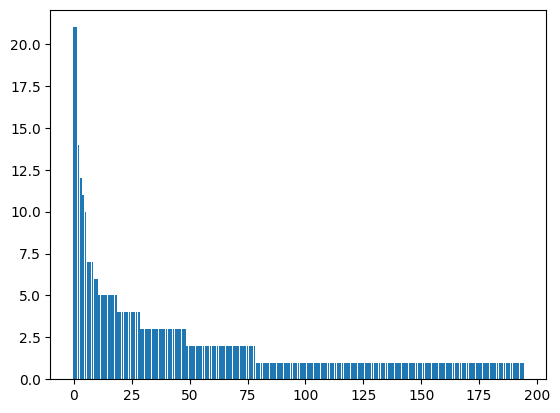

[('저작권', 21), ('서비스', 21), ('이미지', 14), ('지니', 12), ('뮤직', 11), ('문제', 10), ('편곡', 7), ('음원', 7), ('기업', 7), ('협회', 6), ('수익', 6), ('상태', 5), ('관련', 5), ('회사', 5), ('퓨전', 5), ('데이터', 5), ('해결', 5), ('테이블', 5), ('공개', 5), ('어도비', 4), ('통해', 4), ('업계', 4), ('악보', 4), ('향후', 4), ('캡쳐', 4), ('음악', 4), ('게티', 4), ('웹사이트', 4), ('콘텐츠', 4), ('라며', 3), ('창작', 3), ('때문', 3), ('판매', 3), ('지난달', 3), ('사업', 3), ('베타서비스', 3), ('대표', 3), ('이스트소프트', 3), ('활용', 3), ('확보', 3), ('음저협', 3), ('협의', 3), ('유통', 3), ('기술', 3), ('위해', 3), ('분쟁', 3), ('훈련', 3), ('앞서', 3), ('제공', 3), ('사실', 2), ('실제', 2), ('사용', 2), ('사용자', 2), ('상업', 2), ('정식', 2), ('이슈', 2), ('제품', 2), ('시작', 2), ('진행', 2), ('솔루션', 2), ('창작물', 2), ('스톡', 2), ('각종', 2), ('논란', 2), ('관계자', 2), ('무료', 2), ('허락', 2), ('박현진', 2), ('파이어플라이', 2), ('규제', 2), ('발생', 2), ('출시', 2), ('보호', 2), ('법안', 2), ('그림', 2), ('강조', 2), ('논의', 2), ('계속', 2), ('내용', 2), ('전달', 1), ('행보', 1), ('절차', 1), ('합의', 1), ('제작', 1), ('전혀', 1), ('저작자', 1), ('초기', 1), ('협약', 1

In [9]:
import numpy as np
import matplotlib.pyplot as plt
vect = CountVectorizer().fit(txt2)

#bow의 출현횟수 합계
cnt = vect.transform(txt2).toarray().sum(axis=0)
idx = np.argsort(-cnt) #카운트 내림차순 정렬
cnt = cnt[idx]

# x축의 단어이름
feature_name = np.array(vect.get_feature_names_out())[idx]

plt.bar(range(len(cnt)), cnt)
plt.show()
print(list(zip(feature_name,cnt)))

In [10]:
#불용어 추가
vector = CountVectorizer(stop_words=['더'])
print(vector.fit_transform(txt2).toarray())
print(vector.vocabulary_)

[[ 2  2  1  1  1  4  1  2  1  1  5  2  5  1  2  1  2  1  1  1  3  7  1  1
   1  2  2  2  1  1  1  1  1  3  1  1  5  1  1  1  3  3  1  1  1  1  1  1
   1  1  2 10 11  1  2  1  2  1  1  1  2  3  2  1  3  1  1  1  2  3  2  2
   2  5  1 21  1  1  1  1  2  1  6  2  1  2  1  1  2  4  1  3  1  4  4  1
   1  1  1  1  1  1  1  1  1  4  3  1  3  1  1  4  7  3  1  1 14  1  2  3
   1  1  1  1  1  1  1  1  1  1  1 21  1  1  1  1  2  3  1  2  1  1  1  1
   1  3  1  1 12  1  2  3  2  1  1  1  1  2  1  1  1  4  4  1  1  5  4  1
   2  1  3  1  7  1  5  1  1  1  1  1  5  1  1  4  2  1  3  6  1  1  3  3
   5  3  1]]
{'이미지': 116, '음악': 111, '저작권': 131, '문제': 51, '해결': 180, '기업': 21, '수익': 82, '연결': 99, '이소연': 117, '기자': 22, '입력': 124, '타임': 164, '음성': 110, '듣기': 38, '번역': 59, '설정': 76, '글씨': 17, '크기': 163, '조절': 140, '인쇄': 122, '지니': 148, '뮤직': 52, '협회': 187, '상태': 73, '서비스': 75, '공개': 10, '업계': 94, '향후': 183, '데이터': 36, '확보': 190, '필수': 176, '음원': 112, '편곡': 172, '웹사이트': 105, '캡쳐': 161, '창작': 151, '허락': 